# Описание проекта 

**Цель проекта**: проанализировать клиентов регионального банка «Метанпром», определить факторы, влияющие на отток клиентов, выделить сегменты с повышенным риском ухода и предложить рекомендации по их удержанию.

**План работы**

1. Загрузка и описание данных
   
   1.1. Загрузить датасет bank_scrooge.csv.
   
   1.2. Ознакомиться со структурой данных: количество строк и столбцов, типы переменных.
   
   1.3. Проверить уникальные значения и распределения для категориальных признаков (city, gender).


2. Подготовка данных
  
   2.1. Проверка на дубликаты:
   * Проверить наличие полных и частичных дубликатов по всем столбцам
   * Проверить уникальность идентификатора USERID
   * При обнаружении неявных дубликатов по USERID — проанализировать их содержимое и принять решение о дальнейшей работе (удаление, объединение или оставление)

   2.2. Анализ пропусков:
   * Определить долю пропусков по каждому признаку
   * Классифицировать пропуски по типам: (MCAR (случайные), MAR (условно случайные), MNAR (зависящие от данных))
   * Проверить зависимость пропусков от других признаков с помощью бинарных индикаторов (1 — есть пропуск, 0 — нет пропуска) и анализа корреляций

   2.3. Проверка типов данных:
   * Убедиться, что все числовые и категориальные признаки имеют корректный формат
   * Преобразовать бинарные переменные (credit_card, last_activity, churn) в формат 0/1

   2.4. Кодирование категориальных признаков:
   * Для неупорядоченных категориальных признаков (city, gender) использовать one-hot encoding (через pandas.get_dummies()), сохранив оригинальные столбцы
   

3. Исследовательский анализ данных (EDA)
   
   3.1. Проанализировать и визуализировать распределения всех признаков

   3.2. Провести корреляционный анализ

   3.4. Сделать промежуточные выводы:
   

4. Проверка статистических гипотез
   

5. Подведение промежуточных итогов и определение факторов, влияющих на отток
   

6. Сегментация клиентов по признакам, связанным с оттоком и приоритизация выделенных сегментов


7. Разработка рекомендаций для отдела маркетинга

**Описание данных**

- USERID — идентификатор пользователя
- score — баллы кредитного скоринга (чем выше, тем надёжнее заемщик)
- city — город
- gender — пол (Male, Female)
- age — возраст 
- equity — количество баллов собственности
- balance — баланс на счёте
- products — количество продуктов, которыми пользуется клиент 
- credit_card — есть ли кредитная карта (1 — есть, 0 — нет)
- last_activity — активный клиент (1 — активный, 0 — неактивный)
- EST_SALARY — оценочный доход клиента
- сhurn — признак оттока (1 — клиент ушёл из банка, 0 — остался)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/bank_scrooge.csv')

display(df.head(5))
display(df.describe())
display (df.info())

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

**Выводы**

В таблице содержится 10 000 строк и 12 столбцов, каждый из которых представляет собой отдельный признак, описывающий клиентов банка.

- типы данных распределены следующим образом:
  * 4 признака — float64
  * 6 признаков — int64
  * 2 признака — object (текстовые категории: city, gender)
- в столбцах age и balance наблюдаются пропуски
- остальные признаки заполнены полностью

Основные статистические характеристики числовых данных:
- среднее значение кредитного скоринга (score) — 848,7 баллов
- средний возраст клиентов — 42,7 года
- средний баланс на счёте — около 827 794 медиана — 524 272 
- оценочный доход в среднем составляет 147 867 
- среднее количество продуктов — 1,87, при максимальном значении 5
- доля клиентов с кредитной картой — 68%, активных клиентов — 52%
- средний уровень оттока (churn) — 18,2% от общего числа клиентов

In [3]:
# приведем данные к нижему регистру 
df.columns = df.columns.str.strip().str.lower()

# переименуем столбцы для удобства
df.rename(columns={'userid': 'user_id'}, inplace=True)
display(df.head(1))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1


In [4]:
# посмотрим уникальные значения для категориальных признаков
print('Уникальные значения city:', df['city'].unique())
print('Уникальные значения gender:', df['gender'].unique())

# посмотрим распределение для категориальных признаков
print('Распределение по городам', df['city'].value_counts())
print('Распределение по полу', df['gender'].value_counts())

Уникальные значения city: ['Рыбинск' 'Ярославль' 'Ростов']
Уникальные значения gender: ['Ж' 'М']
Распределение по городам Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64
Распределение по полу М    5005
Ж    4995
Name: gender, dtype: int64


**Выводы**

Банк «Метанпром» представлен в трёх городах Ярославской области, при этом данные охватывают как мужчин, так и женщин в примерно равных пропорциях. Распределение клиентов по полу является практически равномерным, что исключает пол как фактор дисбаланса выборки. В то же время видно, что основная часть клиентской базы банка сосредоточена в Ярославле

# Подготовка данных к анализу


# Проверка на наличие дубликатов

In [5]:
# делаем копию текущего датасета
data = df.copy()

# проверяем на наличие дубликатов 
print('Число полных дубликатов:', data.duplicated(keep=False).sum())
# проверяем на наличие неявных дубликатов 
print('Есть повторяющиеся user_id', data['user_id'].duplicated().sum())
# прверим уникальность идентификатора user_id
print('Количество уникальных user_id:', data['user_id'].nunique())
print('Общее количество строк:', data.shape[0])

Число полных дубликатов: 0
Есть повторяющиеся user_id 73
Количество уникальных user_id: 9927
Общее количество строк: 10000


**Выводы**

Полных дубликатов в данных нет, однако присутствует 73 неявных дубликата клиентов по признаку user_id. Это может указывать либо на технические ошибки при выгрузке данных, либо на наличие нескольких записей об одном и том же клиенте. Данный факт требует дополнительной проверки перед проведением исследовательского анализа.

In [6]:
# выводим все повторяющиеся user_id
duplicate_users = data[data['user_id'].duplicated()]

# сгруппируем и посмотрим, сколько уникальных значений в каждой группе по user_id
duplicate_check = duplicate_users.groupby('user_id').nunique()
display(duplicate_check.head(20))

# удаляем дубликаты
data = data.drop_duplicates(subset='user_id')
print('Количество строк после удаления дубликатов:', data.shape[0])

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
user_id,,,,,,,,,,,
116540,1,1,1,1,1,0,1,1,1,1,1
117943,1,1,1,1,1,0,1,1,1,1,1
120258,1,1,1,1,1,0,1,1,1,1,1
123461,1,1,1,1,1,0,1,1,1,1,1
124450,1,1,1,1,1,1,1,1,1,1,1
126368,1,1,1,1,1,0,1,1,1,1,1
127440,1,1,1,0,1,0,1,1,1,1,1
129785,1,1,1,1,1,0,1,1,1,1,1
131419,1,1,1,1,1,1,1,1,1,1,1


Количество строк после удаления дубликатов: 9927


**Выводы**

Проверка записей с повторяющимися идентификаторами user_id показала, что для всех клиентов из этой выборки количество уникальных значений по каждому признаку равно 1. Это означает, что все дубликаты являются полностью идентичными по большинству признаков и представляют собой технические копии строк, а не разные состояния одного клиента.

При этом в столбцах balance и age наблюдаются нулевые значения. Эти значения встречаются не только среди дублирующихся записей, но и в других наблюдениях датасета, что позволяет предположить, что нули не связаны с ошибками дублирования, а отражают особенности заполнения исходных данных (например, отсутствие информации о балансе или возрасте клиента).

Таким образом, дубликаты можно безопасно удалить без потери информации, сохранив по одной записи для каждого клиента. После очистки выборки объём данных составил 9 927 уникальных клиентов

# Проверка на наличие пропусков

In [7]:
# смотрим на колличество пропусков 
def show_missing_stats(df):
    stats = pd.DataFrame({
        'Кол-во пропусков': df.isnull().sum(),
        'Доля пропусков': df.isnull().mean().round(4)
    }).sort_values(by='Доля пропусков', ascending=False)
    return stats.style.background_gradient(cmap='coolwarm')

# вызываем функцию
show_missing_stats(data)

,Кол-во пропусков,Доля пропусков
balance,2260,0.227700
age,4,0.000400
user_id,0,0.000000
score,0,0.000000
city,0,0.000000
gender,0,0.000000
equity,0,0.000000
products,0,0.000000
credit_card,0,0.000000
last_activity,0,0.000000


**Выводы**

Пропуски выявлены только в признаках balance и age. Основное внимание на следующем этапе будет уделено анализу пропусков по balance, так как их доля существенна и потенциально влияет на достоверность статистического анализа. Незначительное количество пропусков обнаружено в признаке age — 4 строки, что составляет 0,004% от выборки. Такие пропуски не оказывают существенного влияния на результаты анализа и могут быть оставлены без заполнения.

In [8]:
# создадим индикатор пропусков по признаку balance 
data['balance_missing'] = np.where(data['balance'].isna(), 1, 0)

# проверим MCAR — случайные пропуски
corr_check = data.corr()['balance_missing'].sort_values(ascending=False)
print('Корреляция индикатора пропусков с другими признаками:')
display(corr_check)

# проверим на MAR — условно случайные: зависимость пропусков от активности клиента 
mar_check = pd.crosstab(data['last_activity'], data['balance_missing'], normalize='index')
print('Распределение пропусков по активности клиента:')
display(mar_check)

# проверим на MNAR — зависящие от самого признака
salary_check = data.groupby('balance_missing')['est_salary'].describe()
print('Статистики дохода в зависимости от наличия пропуска в balance:')
display(salary_check)

Корреляция индикатора пропусков с другими признаками:


balance_missing    1.000000
est_salary         0.307032
credit_card        0.157833
score              0.137821
last_activity      0.027821
user_id            0.003811
age               -0.026918
churn             -0.249174
products          -0.486193
equity            -0.708527
balance                 NaN
Name: balance_missing, dtype: float64

Распределение пропусков по активности клиента:


balance_missing,0,1
last_activity,,
0,0.784567,0.215433
1,0.761208,0.238792


Статистики дохода в зависимости от наличия пропуска в balance:


,count,mean,std,min,25%,50%,75%,max
balance_missing,,,,,,,,
0,7667.0,124660.861908,104848.239622,2546.30,67588.725,106346.99,155363.4600,1395064.45
1,2260.0,226700.563111,199981.667262,20274.03,120457.015,174755.35,240451.8125,1333687.36


**Выводы**

- Корреляционный анализ выявил значимую связь с признаками equity (-0.71), products (-0.49) и est_salary (+0.31). Это свидетельствует о зависимости пропусков от характеристик клиента, что исключает тип MCAR.
- Сравнение долей пропусков по активности клиентов показало, что у активных пользователей доля отсутствующих значений немного выше (24,1%) по сравнению с неактивными (21,7%), что подтверждает условно случайную природу пропусков (MAR).
- Дополнительный анализ показал, что клиенты с пропусками имеют в среднем более высокий доход (226 тыс. против 124 тыс.), что может указывать на частичную зависимость пропусков от самого признака balance

**Итог:**

Пропуски в признаке balance имеют смешанный характер (MAR/MNAR) — они не случайны и зависят как от внешних признаков, так и от самого показателя баланса. Заполнение таких пропусков средними или медианой приведёт к искажению распределения, поэтому заполнять их не будем. Для анализа данных будем учитывать этот признак через бинарный индикатор balance_missing

# Проверка типов данных

In [9]:
display(data.dtypes)

# Проверяем уникальные значения
print('credit_card:', data['credit_card'].unique())
print('last_activity:', data['last_activity'].unique())
print('churn:', data['churn'].unique())

user_id              int64
score              float64
city                object
gender              object
age                float64
equity               int64
balance            float64
products             int64
credit_card          int64
last_activity        int64
est_salary         float64
churn                int64
balance_missing      int64
dtype: object

credit_card: [0 1]
last_activity: [1 0]
churn: [1 0]


**Выводы**

Все признаки имеют корректные типы:
- числовые и категориальные переменные записаны в подходящем формате (int64, float64, object);
- бинарные признаки (credit_card, last_activity, churn) уже приведены к числовому виду (0/1) и не содержат пропусков;
- категориальные признаки (city, gender) корректно сохранены в виде текстовых переменных типа object.

Данные не требуют дополнительного преобразования и полностью готовы для проведения исследовательского анализа

# Кодирование категориальных признаков

In [10]:
data = pd.get_dummies(df, columns=['city', 'gender'])
display(data.head(5))

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


Для корректного анализа категориальных признаков (city и gender) было выполнено кодирование методом One-Hot Encoding с помощью функции pd.get_dummies() с параметром drop_first=True, что позволило избежать мультиколлинеарности при последующем корреляционном анализе.

В результате получены бинарные переменные:
- city_Рыбинск, city_Ярославль (базовая категория — Ростов);
- gender_M (базовая категория — Ж).

# Средние значения признаков по группам (для тех, кто ушёл и тех, кто остался)

In [11]:
# группируем таблицу по признаку churn и подсчитываем среднее значение по всем столбцам
churn_mean = data.groupby('churn').mean().reset_index()
display(churn_mean)

,churn,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,0,172004.359046,845.428362,43.020846,2.374817,7.339826e+05,1.757579,0.709169,0.483741,147783.200108,0.140709,0.276039,0.583252,0.532763,0.467237
1,1,170962.345604,863.401099,41.450247,3.763736,1.133993e+06,2.375824,0.551099,0.702198,148243.010198,0.146154,0.240110,0.613736,0.350000,0.650000


**Общие выводы по подготовке данных**

Данные успешно подготовлены к исследовательскому анализу. Проверены и обработаны пропуски, дубликаты и типы данных.
Категориальные признаки закодированы методом One-Hot Encoding, числовые признаки проверены на выбросы и признаны реалистичными.

Средние значения по группам клиентов показали, что отток чаще наблюдается среди:
- клиентов с более высоким балансом и количеством продуктов
- мужчин
- клиентов с большей активностью
- пользователей с высоким кредитным скорингом

# Исследовательский анализ данных (EDA)

# Распределение признаков по группам (для тех, кто ушёл и тех, кто остался)

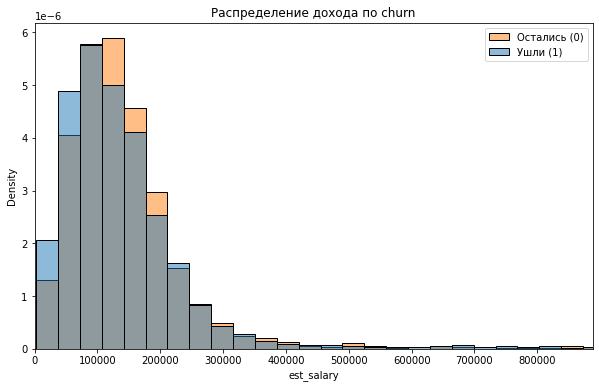

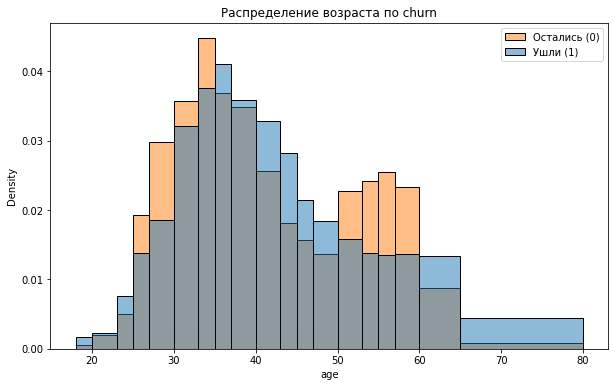

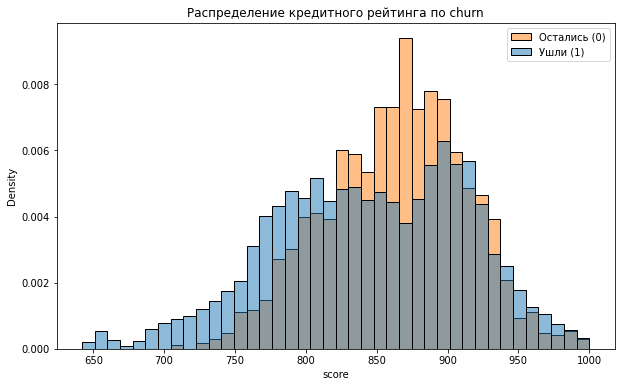

count         7703.0
mean        828009.0
std        1980826.0
min              6.0
25%         295699.0
50%         524295.0
75%         980801.0
max      119113552.0
Name: balance, dtype: float64


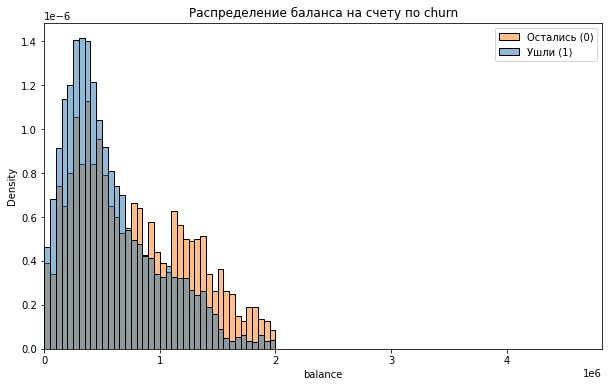

In [12]:
# графики для непрерывных признаков
# доход
plt.figure(figsize=(10,6))
sns.histplot(data=data,
             x='est_salary',
             hue='churn', 
             stat="density",
             common_norm=False, 
             bins=40,
             alpha=0.5
            )
# распределение основной группы клиентов 
plt.xlim(0, data['est_salary'].quantile(0.99)) 
plt.title('Распределение дохода по churn')
plt.legend(labels=['Остались (0)', 'Ушли (1)'])
plt.show()

# возраст
plt.figure(figsize=(10,6))
sns.histplot(data=data, 
             x='age', 
             hue='churn', 
             stat="density", 
             common_norm=False, 
             bins=[18, 20, 23, 25, 27, 30, 33, 35, 37, 40, 43, 45, 47, 50, 53, 55, 57, 60, 65, 80], 
             alpha=0.5
            )
plt.title('Распределение возраста по churn')
plt.legend(labels=['Остались (0)', 'Ушли (1)'])
plt.show() 

# скоринг
plt.figure(figsize=(10,6))
sns.histplot(data=data, 
             x='score', 
             hue='churn', 
             stat="density", 
             common_norm=False, 
             bins=40, 
             alpha=0.5
            )
plt.title('Распределение кредитного рейтинга по churn')
plt.legend(labels=['Остались (0)', 'Ушли (1)'])
plt.show()

# баланс
# убираем клиентов с нулевым балансом и играничиваем убираем выбросы 
print(data.query('balance > 0')['balance'].describe().round())
lim_balance= data.query('balance > 0 and balance < 2_000_000')
                        
plt.figure(figsize=(10,6))
sns.histplot(data=lim_balance,
             x='balance',
             hue='churn', 
             stat="density",
             common_norm=False, 
             bins=40,
             alpha=0.5
            )
# распределение основной группы клиентов
plt.xlim(0, data['balance'].quantile(0.99)) 
plt.title('Распределение баланса на счету по churn')
plt.legend(labels=['Остались (0)', 'Ушли (1)'])
plt.show()

**Выводы**: 

**Распределение по score** (кредитный рейтинг)
- Клиенты с низкими значениями кредитного скоринга (до ~800) чаще уходят из банка.
- При этом основная масса лояльных клиентов имеет score в диапазоне 830–900.
- Это указывает на то, что надежные клиенты (с высоким скорингом) менее склонны к оттоку.

Вывод: высокий кредитный рейтинг коррелирует с низкой вероятностью оттока.

**Распределение по age** (возраст)
- Наибольшая доля оттока приходится на клиентов в возрасте от 25 до 40 лет — наиболее активную и мобильную категорию пользователей.
- После 45 лет доля ушедших заметно снижается, что свидетельствует о большей лояльности и стабильности зрелых клиентов.
- Молодые клиенты чаще экспериментируют с банковскими услугами и выбирают более выгодные предложения конкурентов.

Вывод: клиенты в возрасте до 40 лет характеризуются повышенной вероятностью оттока, тогда как возрастные клиенты демонстрируют более устойчивое поведение и приверженность банку.

**Распределение по balance** (баланс на счёте)

Для корректного анализа были исключены клиенты с нулевым балансом и выбросы выше 2 млн руб. — этот лимит охватывает около 99% выборки и отражает типичных клиентов.

- Большинство клиентов имеют небольшой баланс, и среди них доля оттока выше среднего.
- Для клиентов с высокими остатками на счетах (от 800 тыс. до 1 млн руб.) уровень оттока заметно ниже.
- Это подтверждает гипотезу, что финансово активные клиенты более лояльны, а низкий баланс связан с повышенной вероятностью ухода из банка.

**Распределение по est_salary** (оценочный доход)

Для корректного отображения данных из анализа были исключены выбросы с доходом выше 99-го процентиля — около 2 млн руб. Это позволило сфокусироваться на основной массе клиентов, где сосредоточено большинство наблюдений.

- Основная часть клиентов зарабатывает до 200 тыс. руб. в месяц.
- Наибольшая доля оттока наблюдается среди клиентов со средним доходом (100–150 тыс. руб.), в то время как клиенты с низким (<50 тыс.) и высоким (>200 тыс.) доходом демонстрируют большую лояльность.

Вывод: уровень дохода оказывает слабое влияние на отток, однако клиенты со средним доходом чаще меняют банк, вероятно, из-за чувствительности к условиям обслуживания и тарифам.

In [29]:
print('products', data['products'].unique())
# у клиента не может не быть ни одного продукта банка 
print(data['products'].value_counts())
# удаляем клиента с нулевым количеством продуктов
data = data.query('products > 0')

products [2 3 1 4 5]
2    5126
1    3341
3    1039
4     474
5      19
Name: products, dtype: int64


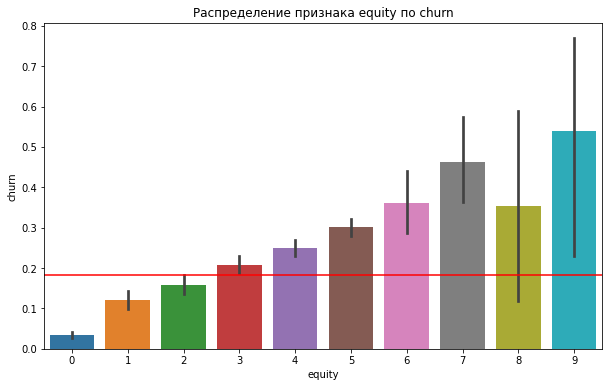

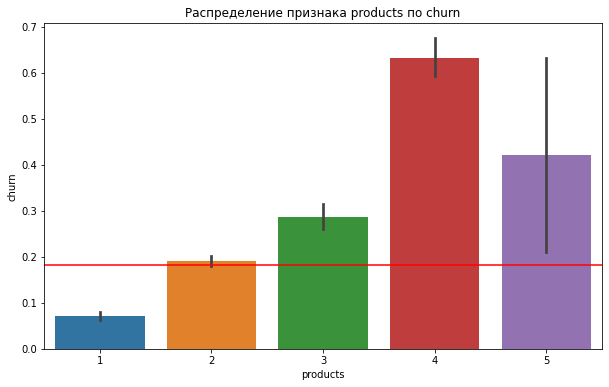

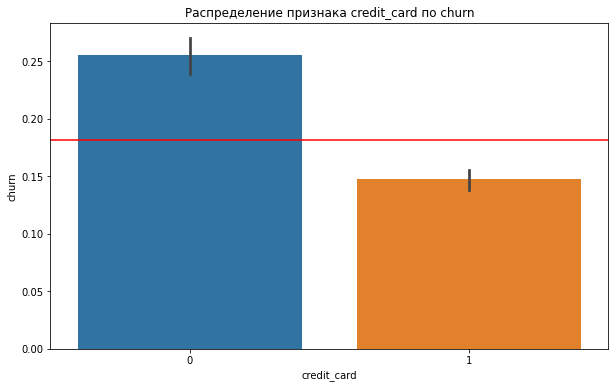

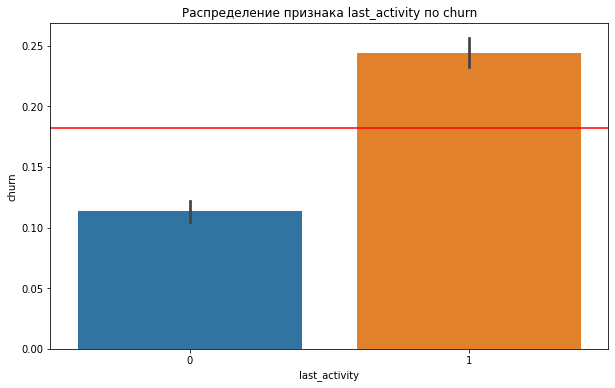

In [30]:
# дискретные признаки
discrete_cols = ['equity', 'products', 'credit_card', 'last_activity']

for col in discrete_cols:
    plt.figure(figsize=(10,6))
    sns.barplot(x=col, y='churn', data=data)
    plt.title(f'Распределение признака {col} по churn')
    plt.axhline(data['churn'].mean(), color='red')
    plt.show()

**Выводы:**

**Распределение по equity** (уровень капитала клиента)
- С ростом значения equity (капитала) наблюдается увеличение вероятности оттока.
- Клиенты с низким капиталом (<3) реже уходят, а среди клиентов с equity ≥6 доля оттока значительно выше среднего.
- Возможно, такие клиенты переносят активы в другие банки или меняют стратегии инвестирования.

Вывод: высокий капитал ассоциируется с большей вероятностью ухода клиента.

**Распределение по products** (количество продуктов банка)
- Клиенты, имеющие только 1 продукт, демонстрируют самый высокий уровень оттока.
- При увеличении количества продуктов до 2–3 отток заметно снижается.
- Однако при 4–5 продуктах отток снова возрастает — возможно, это клиенты с комплексными услугами, которые закрывают счета.

Вывод: наиболее лояльны клиенты, пользующиеся 2–3 банковскими продуктами.

**Распределение по credit_card (наличие кредитной карты)**
- Владельцы кредитных карт (1) демонстрируют меньшую долю оттока, чем клиенты без карты (0).
- Это указывает на то, что использование кредитных продуктов повышает удержание клиентов.

Вывод: наличие кредитной карты снижает вероятность ухода из банка.

**Распределение по last_activity** (активность клиента)
- Клиенты, отмеченные как активные (1), чаще остаются в банке.
- Среди неактивных клиентов (0) доля оттока выше среднего уровня.

Вывод: регулярная активность — один из ключевых факторов удержания клиента.

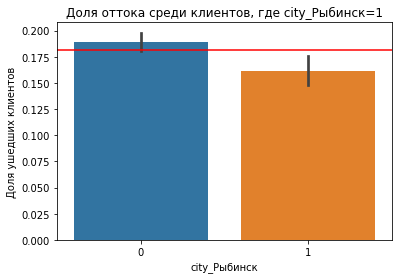

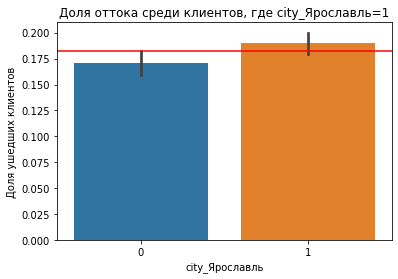

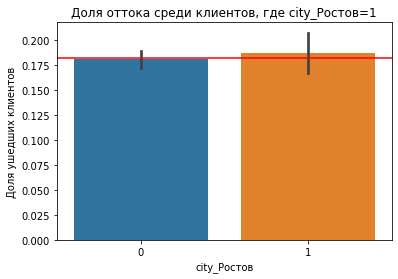

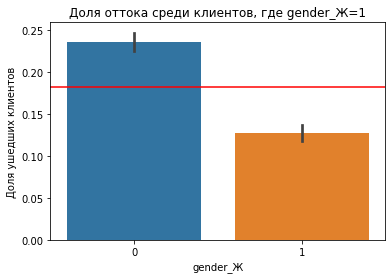

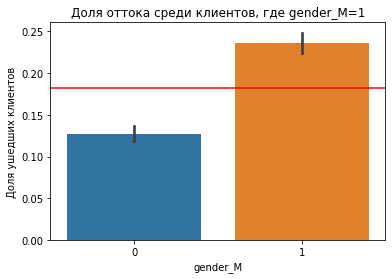

In [15]:
# Категориальные dummy-переменные
cat_dummies = ['city_Рыбинск', 'city_Ярославль', 'city_Ростов', 'gender_Ж', 'gender_М']

for col in cat_dummies:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='churn', data=data)
    plt.title(f'Доля оттока среди клиентов, где {col}=1')
    plt.axhline(data['churn'].mean(), color='red')
    plt.ylabel('Доля ушедших клиентов')
    plt.show()

**Выводы:**

**city_Рыбинск**
- Доля оттока клиентов из Рыбинска чуть ниже среднего уровня (красная линия).
- Это говорит о стабильной клиентской базе и, вероятно, хорошем удержании в этом регионе.

**city_Ярославль**
- Клиенты из Ярославля демонстрируют отток выше среднего.
- Возможно, в этом городе сильная конкуренция между банками или меньше вовлечённость клиентов в банковские продукты.

**city_Ростов**
- Уровень оттока в Ростове сопоставим со средним по выборке, но незначительно выше.
- Это может говорить о нейтральной вовлечённости — без выраженных отклонений.

**Вывод по регионам:**
- Наиболее лояльные клиенты — в Рыбинске,
- Наибольший риск потери клиентов наблюдается в Ярославле.

**gender_Ж**
- Доля оттока среди женщин ниже среднего уровня.
- Женщины чаще остаются клиентами банка, что может быть связано с более осторожным финансовым поведением.

**gender_М**
- Мужчины демонстрируют выше среднего уровень оттока.
- Возможно, они чаще меняют банк или кредитные условия, ориентируясь на выгоду.

**Вывод по полу**: женщины в среднем более лояльны банку, мужчины — чаще уходят.

# Boxplot для признаков, которые в визуализациях показали различия между группами churn

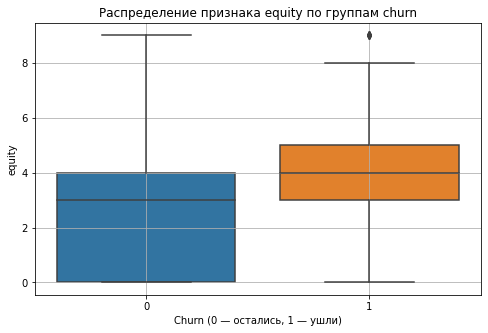

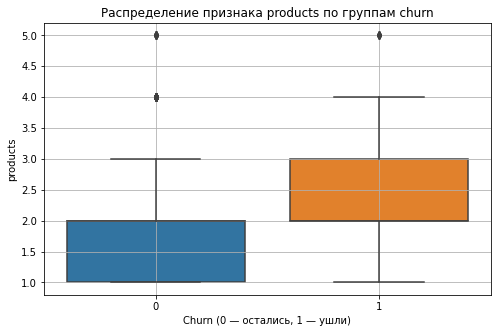

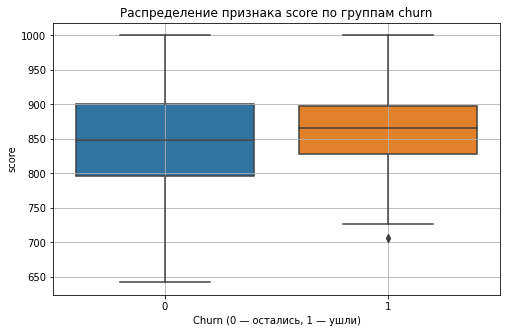

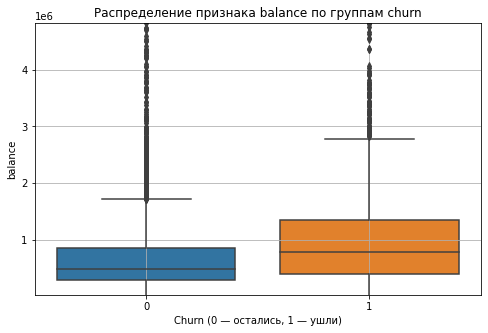

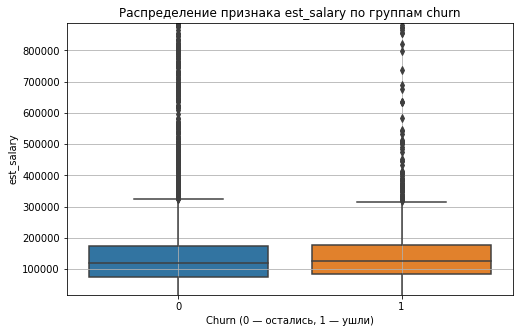

In [16]:
boxplot_features = ['equity', 'products', 'score']

for col in boxplot_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, x='churn', y=col)
    
    plt.title(f'Распределение признака {col} по группам churn')
    plt.xlabel('Churn (0 — остались, 1 — ушли)')
    plt.ylabel(col)
    plt.grid()
    plt.show()
    
boxplot_features = ['balance', 'est_salary']

for col in boxplot_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, x='churn', y=col)
    
    # ограничение по оси Y для лучшей читаемости
    low = data[col].quantile(0.01)
    high = data[col].quantile(0.99)
    plt.ylim(low, high)
    plt.title(f'Распределение признака {col} по группам churn')
    plt.xlabel('Churn (0 — остались, 1 — ушли)')
    plt.ylabel(col)
    plt.grid()
    plt.show()

**Выводы**

1. **Equity** (капитал клиента)
- Ушедшие клиенты имеют заметно более высокий уровень equity, чем оставшиеся
- Это может означать, что пользователи с крупным капиталом менее заинтересованы в удержании банковских продуктов — у них выше финансовая независимость и больше альтернатив

2. **Products** (количество продуктов)
- Клиенты с меньшим количеством продуктов чаще уходят, тогда как у оставшихся медиана чуть выше
- Вероятно, мультипродуктовые клиенты (те, у кого 2 и более услуг) более лояльны — им сложнее перейти в другой банк

3. **Score** (кредитный рейтинг)
- Разница между группами churn = 0 и churn = 1 выражена слабо
- Небольшое смещение медианы вверх у ушедших клиентов может указывать, что клиенты с хорошим рейтингом чаще меняют банк в поиске более выгодных условий

4. **Balance** (баланс на счёте)
- Медианное значение баланса у ушедших клиентов значительно выше, чем у оставшихся
- Можно предположить, что клиенты с крупными суммами активов чувствуют себя более свободно в выборе банка

5. **Est_salary** (оценочный доход)
- Наблюдается схожая тенденция: ушедшие клиенты имеют чуть более высокий доход, чем оставшиеся
- Вероятно, уровень дохода также влияет на мобильность клиента — обеспеченные пользователи склонны менять банк при неудовлетворённости сервисом

**Общие выводы**

Boxplot-анализ подтверждает результаты гистограмм:
- наиболее склонны к оттоку клиенты с высокими доходами, крупными балансами и капиталом, а также те, кто имеет меньше банковских продуктов
- эти признаки можно рассматривать как потенциально значимые для последующего моделирования оттока

# Корреляционный анализ

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
score,1.000000,-0.012339,0.064103,0.235812,-0.003708,-0.094503,-0.031004,0.164049,0.105634,-0.037572,-0.000609,0.027180,-0.012429,0.012429
age,-0.012339,1.000000,0.020581,0.069745,0.017900,-0.122761,-0.007849,-0.039354,-0.050463,0.047128,0.028978,-0.059549,0.212628,-0.212628
equity,0.064103,0.020581,1.000000,0.164126,0.432235,-0.167497,-0.001950,-0.171965,0.270581,0.036300,-0.005651,-0.020634,0.021604,-0.021604
balance,0.235812,0.069745,0.164126,1.000000,0.075684,-0.059253,0.025004,0.339622,0.085577,-0.035805,-0.034697,0.057342,-0.051711,0.051711
products,-0.003708,0.017900,0.432235,0.075684,1.000000,-0.251831,0.036905,-0.118299,0.301616,-0.006223,-0.042259,0.042515,0.022916,-0.022916
credit_card,-0.094503,-0.122761,-0.167497,-0.059253,-0.251831,1.000000,-0.033603,0.035432,-0.130524,-0.098534,-0.049880,0.114816,-0.126223,0.126223
last_activity,-0.031004,-0.007849,-0.001950,0.025004,0.036905,-0.033603,1.000000,0.002947,0.169037,0.006962,0.048993,-0.049111,0.013768,-0.013768
est_salary,0.164049,-0.039354,-0.171965,0.339622,-0.118299,0.035432,0.002947,1.000000,0.001460,-0.106101,-0.057300,0.126870,-0.082295,0.082295
churn,0.105634,-0.050463,0.270581,0.085577,0.301616,-0.130524,0.169037,0.001460,1.000000,0.006112,-0.031605,0.024165,-0.141287,0.141287
city_Ростов,-0.037572,0.047128,0.036300,-0.035805,-0.006223,-0.098534,0.006962,-0.106101,0.006112,1.000000,-0.246763,-0.486296,0.015072,-0.015072


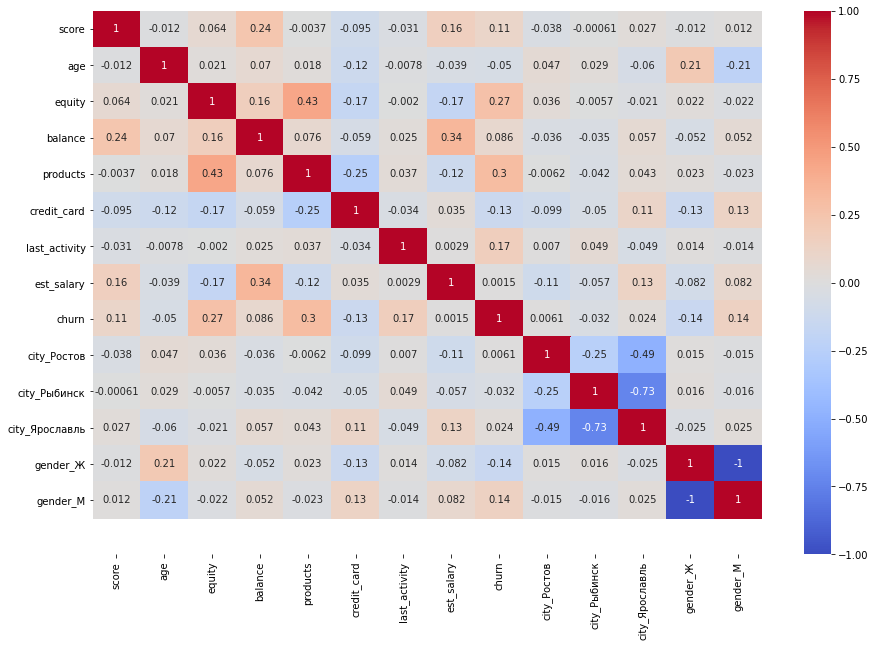

In [17]:
cm = data.drop(columns=['user_id']).corr()
fig, ax = plt.subplots(figsize=(15,10))
display(cm)

# нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, cmap='coolwarm', annot=True, center=0)
ax.set_ylim(
    15, 0
)
plt.show()

**Выводы**

Для количественных признаков рассчитана матрица парных корреляций (метод Пирсона) и построена тепловая карта зависимостей.

Основные наблюдения: мультиколлинеарность между признаками не выявлена — большинство коэффициентов находятся в диапазоне от –0.2 до 0.3. Это говорит о том, что признаки относительно независимы и могут использоваться совместно при дальнейшем анализе.

Связи с целевой переменной churn:
- equity — умеренная положительная корреляция (0.27). Это говорит о том, что между уровнем капитала клиента и вероятностью оттока есть слабая линейная зависимость: при увеличении капитала чаще встречается уход, но это не означает, что капитал является причиной оттока.
- products — положительная корреляция (0.30). Между числом продуктов и уходом клиентов есть слабая линейная связь: чем больше продуктов, тем чаще наблюдается отток. Однако причинно-следственная связь не доказывается.
- credit_card — отрицательная корреляция (–0.13). Наличие кредитной карты слабо связано с меньшей вероятностью оттока.
- last_activity — положительная корреляция (0.16). Чем ниже активность, тем выше вероятность ухода, но это лишь тенденция, а не доказательство причины.

Взаимосвязь между финансовыми признаками (balance, est_salary, score) слабая или умеренная, что естественно, так как все они характеризуют финансовое положение клиента.

**Общие выводы**:

Корреляционный анализ показал наличие слабых и умеренных линейных зависимостей между признаками и фактом оттока клиентов. Полученные значения коэффициентов можно использовать для формулировки статистических гипотез и выбора признаков, потенциально связанных с оттоком, но не для утверждения о причинно-следственных связях.

**Общие выводы по разделу EDA**

В ходе EDA были изучены распределения признаков, структура выборки и взаимосвязи между переменными. Основное внимание уделялось сравнению характеристик клиентов, остававшихся в банке (churn = 0) и ушедших (churn = 1), а также выявлению признаков, наиболее связанных с оттоком

1. Распределение признаков

**Balance** (баланс):
- Ушедшие клиенты имеют более высокий баланс. Интервалы, где доля оттока превышает средний уровень (27%), — баланс выше 700 000–800 000 у.е. Это может говорить о том, что клиенты с крупными суммами на счетах менее зависимы от банка и чаще уходят при неудовлетворенности условиями обслуживания
 
**Est_salary** (оценочный доход):
- Более высокий доход также связан с повышенной вероятностью оттока. Наибольший риск наблюдается при доходе выше 150 000 у.е. Клиенты с высокими доходами обладают большей финансовой свободой и активнее выбирают альтернативные банки

**Score** (кредитный рейтинг):
- Различия между группами умеренные. Незначительно более высокие значения рейтинга (850+) чаще встречаются среди клиентов, покинувших банк

**Age** (возраст):
- Распределение имеет сложную форму, но отток несколько чаще наблюдается у клиентов в возрасте 30–45 лет, что может указывать на возрастную группу наиболее активных пользователей банковских услуг

**Equity** (капитал клиента):
- Клиенты с более высоким капиталом (3–5 ед.) чаще уходят из банка. Это подтверждает тенденцию, что обеспеченные пользователи менее лояльны.

**Products** (количество продуктов):
- Наиболее высокая доля оттока — среди клиентов, имеющих 1 банковский продукт
- Напротив, клиенты, использующие 2 и более продукта, демонстрируют гораздо меньший риск ухода
- Это указывает на необходимость стимулирования мультипродуктового использования

**Credit_card**:
- Наличие кредитной карты связано с меньшей вероятностью оттока, что делает данный продукт потенциальным инструментом удержания клиентов

**Last_activity** (активность):
- Меньшая активность коррелирует с более высоким оттоком. Активные пользователи реже уходят

**Город и пол** (city, gender):
- Между регионами и полом клиентов существенной разницы по уровню оттока не выявлено. Однако небольшое повышение оттока наблюдается в городе Рыбинск

2. Корреляционный анализ

Коэффициенты корреляции (Пирсона) показали, что наиболее выраженные положительные связи с оттоком:
- equity (0.27)
- products (0.30)
- last_activity (0.17)

Наиболее выраженные отрицательные связи:
- credit_card (-0.13)
- age (-0.05)

Важно отметить, что корреляция не означает причинно-следственную зависимость — она лишь отражает наличие линейной связи между переменными. Тем не менее, выявленные коэффициенты помогают определить направления для дальнейшего моделирования

**Итог:**

В результате анализа можно сделать вывод, что наиболее сильно с оттоком связаны следующие признаки:
- высокий баланс (balance > 700 000)
- высокий доход (est_salary > 150 000)
- крупный капитал (equity ≥ 3)
- малое количество продуктов (products = 1)
- низкая активность (last_activity = 0)

# Проверка статистических гипотез

# Средний доход клиентов 

- **Нулевая гипотеза**: средние доходы клиентов, которые остались и которые ушли, примерно **одинаковые**
- **Альтернативная гипотеза**: средние доходы клиентов, которые остались и которые ушли, **отличаются**

In [18]:
# разделение на группы
churn_out = data.query('churn == 1')['est_salary']
churn_in = data.query('churn == 0')['est_salary']

# проверка объёма выборок
print('Объем выборки ушедших клиентов:', len(churn_out))
print('Объем выборки оставшихся клиентов:', len(churn_in))
if len(churn_out) > 30 and len(churn_in) > 30:
    print('Условие ЦПТ выполнено — выборки достаточно большие')
else:
    print('Выборки слишком малы')

# проверка дисперсий
var_out = data.query('churn == 1')['est_salary'].var()
var_in = data.query('churn == 0')['est_salary'].var()

print('Ушедшие:', round(var_out, 2))
print('Оставшиеся:', round(var_in, 2))
print('Отношение дисперсий:', round(var_out / var_in, 2))

Объем выборки ушедших клиентов: 1819
Объем выборки оставшихся клиентов: 8180
Условие ЦПТ выполнено — выборки достаточно большие
Ушедшие: 15107935966.9
Оставшиеся: 20392519451.46
Отношение дисперсий: 0.74


Объём выборок превышает 1000 наблюдений в каждой группе, что удовлетворяет условиям Центральной предельной теоремы (ЦПТ). Следовательно, t-тест устойчив к отклонениям от нормальности. Отношение дисперсий находится в допустимом диапазоне (0.5–2), что позволяет использовать t-тест в стандартной форме (equal_var=True).

Параметр alternative='two-sided' нужен, чтобы проверить именно двустороннюю гипотезу — есть ли вообще различия в рейтингах, без указания направления. 

In [19]:
# проведение t-теста
alpha = 0.05

results = st.ttest_ind(
    churn_out, 
    churn_in, 
    alternative='two-sided',
    equal_var=True
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: средние доходы клиентов, которые остались и которые ушли, отличаются')
else:
    print('Не отвергаем нулевую гипотезу: разница в доходе статистически не доказана') 
    
#проверка
print('Средний доход тех, кто ушел', round(churn_out.mean(), 2))
print('Средний доход, тех кто остался', round(churn_in.mean(), 2))    

p-значение: 0.8839364433181659
Не отвергаем нулевую гипотезу: разница в доходе статистически не доказана
Средний доход тех, кто ушел 148310.73
Средний доход, тех кто остался 147783.2


**Выводы**

Проверка гипотезы о равенстве средних доходов клиентов, ушедших и оставшихся, показала отсутствие статистически значимых различий (t-test, p-value = 0.8987 > 0.05).

Средние доходы двух групп практически совпадают (≈148 тыс. руб.), следовательно, доход не является значимым фактором, влияющим на отток клиентов.

# Средний баланс клиентов 

- **Нулевая гипотеза**: средние баланс клиентов, которые остались и которые ушли, примерно **одинаковые**
- **Альтернативная гипотеза** средние баланс клиентов, которые остались и которые ушли, **отличаются**

In [20]:
# разделение на группы
balance_out = data.query('churn == 1')['balance']
balance_in = data.query('churn == 0')['balance']

# проверка объёма выборок
print('Объем выборки ушедших клиентов:', len(balance_out))
print('Объем выборки оставшихся клиентов:', len(balance_in))
if len(balance_out) > 30 and len(balance_in) > 30:
    print('Условие ЦПТ выполнено — выборки достаточно большие')
else:
    print('Выборки слишком малы')
    
# проверка дисперсий
var_out = data.query('churn == 1')['balance'].var()
var_in = data.query('churn == 0')['balance'].var()

print('Ушедшие:', round(var_out, 2))
print('Оставшиеся:', round(var_in, 2))
print('Отношение дисперсий:', round(var_out / var_in, 2))

Объем выборки ушедших клиентов: 1819
Объем выборки оставшихся клиентов: 8180
Условие ЦПТ выполнено — выборки достаточно большие
Ушедшие: 4137067516951.81
Оставшиеся: 3820354475138.15
Отношение дисперсий: 1.08


Объём выборок превышает 1000 наблюдений в каждой группе, что удовлетворяет условиям Центральной предельной теоремы (ЦПТ). Следовательно, t-тест устойчив к отклонениям от нормальности. Отношение дисперсий находится в допустимом диапазоне (0.5–2), что позволяет использовать t-тест в стандартной форме (equal_var=True).

Параметр alternative='two-sided' нужен, чтобы проверить именно двустороннюю гипотезу — есть ли вообще различия в рейтингах, без указания направления.

In [21]:
# проведение t-теста
balance_out = data.query('churn == 1')['balance'].dropna()
balance_in = data.query('churn == 0')['balance'].dropna()

alpha = 0.05

results = st.ttest_ind(
    balance_out, 
    balance_in, 
    alternative='two-sided',
    equal_var=True
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: средние баланс клиентов, которые остались и которые ушли, отличаются')
else:
    print('Не отвергаем нулевую гипотезу: разница в баланс статистически не доказана') 
    
#проверка
print('Средний баланс тех, кто ушел', round(balance_out.mean(), 2))
print('Средний баланс, тех кто остался', round(balance_in.mean(), 2))    

p-значение: 5.2961006573922e-14
Отвергаем нулевую гипотезу: средние баланс клиентов, которые остались и которые ушли, отличаются
Средний баланс тех, кто ушел 1133993.27
Средний баланс, тех кто остался 733982.59


**Выводы**

Проверка гипотезы о равенстве средних балансов клиентов, ушедших и оставшихся, показала статистически значимые различия (t-test, p-value = 5.3e−14 < 0.05).

Средний баланс ушедших клиентов составляет 1.13 млн руб., что значительно выше, чем у оставшихся (0.73 млн руб). Таким образом, можно сделать вывод, что высокий баланс является фактором, повышающим вероятность оттока — вероятно, более обеспеченные клиенты чувствительнее к условиям обслуживания и активнее меняют банк при неудовлетворённости сервисом.

# Средний капитал клиентов

- **Нулевая гипотеза**: средние капитал клиентов, которые остались и которые ушли, примерно **одинаковые**
- **Альтернативная гипотеза**: средние капитал клиентов, которые остались и которые ушли, **отличаются** 

In [22]:
# разделение на группы
equity_out = data.query('churn == 1')['equity']
equity_in = data.query('churn == 0')['equity']

# проверка объёма выборок
print('Объем выборки ушедших клиентов:', len(equity_out))
print('Объем выборки оставшихся клиентов:', len(equity_in))
if len(equity_out) > 30 and len(equity_in) > 30:
    print('Условие ЦПТ выполнено — выборки достаточно большие')
else:
    print('Выборки слишком малы')

# проверка дисперсий
var_out = data.query('churn == 1')['equity'].var()
var_in = data.query('churn == 0')['equity'].var()

print('Ушедшие:', round(var_out, 2))
print('Оставшиеся:', round(var_in, 2))
print('Отношение дисперсий:', round(var_out / var_in, 2))

Объем выборки ушедших клиентов: 1819
Объем выборки оставшихся клиентов: 8180
Условие ЦПТ выполнено — выборки достаточно большие
Ушедшие: 2.52
Оставшиеся: 3.89
Отношение дисперсий: 0.65


Объём выборок превышает 1000 наблюдений в каждой группе, что удовлетворяет условиям Центральной предельной теоремы (ЦПТ). Следовательно, t-тест устойчив к отклонениям от нормальности. Отношение дисперсий находится в допустимом диапазоне (0.5–2), что позволяет использовать t-тест в стандартной форме (equal_var=True).

Параметр alternative='two-sided' нужен, чтобы проверить именно двустороннюю гипотезу — есть ли вообще различия в рейтингах, без указания направления.

In [23]:
# проведение t-теста
alpha = 0.05

results = st.ttest_ind(
    equity_out, 
    equity_in, 
    alternative='two-sided',
    equal_var=True
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: средние капитал клиентов, которые остались и которые ушли, отличаются')
else:
    print('Не отвергаем нулевую гипотезу: разница в капитал статистически не доказана') 
    
#проверка
print('Средний капитал тех, кто ушел', round(equity_out.mean(), 2))
print('Средний капитал, тех кто остался', round(equity_in.mean(), 2))    

p-значение: 2.6060183523439987e-167
Отвергаем нулевую гипотезу: средние капитал клиентов, которые остались и которые ушли, отличаются
Средний капитал тех, кто ушел 3.76
Средний капитал, тех кто остался 2.37


**Выводы**

Проверка гипотезы о равенстве средних значений капитала клиентов, ушедших и оставшихся, показала статистически значимые различия (t-test, p-value < 0.05).

Средний капитал ушедших клиентов составляет 3.76, что значительно выше, чем у оставшихся (2.37). Таким образом, можно сделать вывод, что уровень капитала является важным фактором, связанным с повышенной вероятностью оттока клиентов.

**Общие выводы по проверке статистических гипотез**

Проведённый статистический анализ подтвердил, что финансовые характеристики клиента (размер капитала и остатка на счёте) значимо связаны с вероятностью оттока, в то время как уровень дохода — нет

Полученные результаты могут быть использованы для:
- уточнения модели прогнозирования оттока (churn prediction)
- разработки программ удержания премиальных клиентов
- улучшения условий обслуживания и персональных предложений для клиентов с крупными остатками и активами

# Подведение промежуточных итогов и определение факторов, влияющих на отток

In [24]:
# определим интервалы или категории риска
data.groupby('churn')[[
    'balance', 
    'equity', 
    'products', 
    'score', 
    'age', 
    'est_salary'
]].describe().round().T

churn                       0           1
balance    count       5898.0      1807.0
           mean      733983.0   1133993.0
           std      1954573.0   2033978.0
           min            0.0         6.0
           25%       279349.0    387218.0
           50%       475382.0    782410.0
           75%       853927.0   1348101.0
           max    119113552.0  64866210.0
equity     count       8180.0      1819.0
           mean           2.0         4.0
           std            2.0         2.0
           min            0.0         0.0
           25%            0.0         3.0
           50%            3.0         4.0
           75%            4.0         5.0
           max            9.0         9.0
products   count       8180.0      1819.0
           mean           2.0         2.0
           std            1.0         1.0
           min            1.0         1.0
           25%            1.0         2.0
           50%            2.0         2.0
           75%            2.0         3.0
           max            5.0         5.0
score      count       8180.0      1819.0
           mean         845.0       863.0
           std           68.0        50.0
           min          642.0       706.0
           25%          796.0       828.0
           50%          848.0       866.0
           75%          900.0       898.0
           max         1000.0      1000.0
age        count       8155.0      1818.0
           mean          43.0        41.0
           std           12.0        11.0
           min           18.0        18.0
           25%           34.0        32.0
           50%           40.0        39.0
           75%           51.0        52.0
           max           86.0        75.0
est_salary count       8180.0      1819.0
           mean      147783.0    148311.0
           std       142802.0    122914.0
           min         2546.0     10880.0
           25%        73506.0     83197.0
           50%       118258.0    125395.0
           75%       173990.0    175985.0
           max      1395064.0   1263028.0

**Выводы**

Для выявления ключевых интервалов использовались медианные значения и 75-е процентильные точки распределения признаков в группах клиентов, покинувших и оставшихся в банке. Наиболее устойчивые различия наблюдаются по признакам баланс, капитал, вовлечённость (количество продуктов) и активность.

**Баланс** (balance)

Анализ показал, что клиенты, покинувшие банк, имеют заметно более высокие значения баланса.
- Медианный баланс ушедших клиентов составляет около 782 тыс. руб.в то время как у оставшихся — 475 тыс. руб.
- 75-й перцентиль среди лояльных клиентов достигает 850 тыс. руб.

Таким образом, баланс свыше 800 тыс. руб. можно считать зоной повышенного риска оттока. Это означает, что более обеспеченные клиенты чаще уходят из банка, вероятно, из-за повышенных ожиданий к качеству сервиса, индивидуальному подходу и условиям обслуживания. Этот результат подтверждается и статистически: различия средних значений по признаку balance оказались значимыми (p < 0.001)

**Капитал клиента** (equity)

Похожая зависимость наблюдается и для признака equity, отражающего количество активов или уровень собственности клиента
- У ушедших клиентов медиана равна 4, в то время как у оставшихся — 3
- Также различия статистически значимы (p < 0.001)

Следовательно, клиенты с капиталом более 2–3 единиц относятся к группе риска. Можно предположить, что такие клиенты имеют более высокий финансовый потенциал, обладают альтернативными инвестиционными возможностями и поэтому более склонны менять банк при неудовлетворённости текущими условиями.

**Количество продуктов** (products)

- клиенты с 1 продуктом демонстрируют более высокий уровень оттока
- пользователи с 2 и более продуктами реже уходят

Это позволяет рассматривать малое количество продуктов как второстепенный, но значимый фактор риска, усиливающий отток в сочетании с другими признаками (например, высоким балансом или низкой активностью)

**Доход** (est_salary), **кредитный скоринг** (score) и **возраст** (age)

Различия по этим признакам статистически не подтверждены (p > 0.05):
- средние доходы ушедших и оставшихся клиентов близки (148 тыс. руб.)
- кредитный рейтинг и возраст распределены сходно в обеих группах

Незначительные тенденции (чуть более высокий score и меньший возраст у ушедших клиентов) не оказывают решающего влияния и могут рассматриваться как фоновые характеристики.

**Общие выводы:**

Объединяя результаты EDA, корреляционного анализа, статистических тестов и сегментации, можно выделить основные факторы, наиболее связанные с вероятностью оттока:
1. Высокий баланс — клиенты с остатками свыше 800 тыс. руб. чаще покидают банк
2. Крупный капитал — пользователи с equity >= 3 имеют более высокий риск оттока
3. Низкая вовлечённость — клиенты с 1 продуктом демонстрируют слабую связь с банком
4. Низкая активность — отсутствие операций повышает риск ухода, особенно у обеспеченных клиентов
5. Молодой возраст — клиенты до 35 лет в целом более мобильны и чувствительны к предложениям конкурентов

# Сегментация клиентов по признакам, связанным с оттоком

# Сегмент 1 - Премиальные клиенты с крупным капиталом 

Признаки и интервалы:
- balance > 800000
- equity >= 3

In [25]:
S1 = data.query('balance > 800_000 and equity >= 3')

print('Объем сигмента:', len(S1))
if len(S1) > 500:
    print('Сегмент достаточно большой')
else:
    print('Сегмент слишком мал')

# расчет среднего уровня оттока в сегменте
S1_churn = S1['churn'].mean()
bank_churn = data['churn'].mean()

print('Отток внутри сегмента:', round(S1_churn, 3))
print('Среднебанковский отток:', round(bank_churn, 3))

if S1_churn > bank_churn:
    print('Отток сегмента выше среднебанковского')
else:
    print('Сегмент не отвечает требованиям по уровню оттока')

Объем сигмента: 2305
Сегмент достаточно большой
Отток внутри сегмента: 0.362
Среднебанковский отток: 0.182
Отток сегмента выше среднебанковского


**Выводы**

- Объём сегмента: 2 305 клиентов
- Отток внутри сегмента: 36.2%

Данный сегмент включает финансово обеспеченных клиентов с крупными остатками на счетах и высоким уровнем капитала.
Именно эта категория демонстрирует наиболее высокий уровень оттока среди всех групп, что указывает на низкую лояльность состоятельных клиентов. Такие клиенты, как правило, более требовательны к качеству обслуживания, персонализированным предложениям и гибкости финансовых условий. Для удержания таких клиентов рекомендуется развивать персональное сопровождение, VIP-программы, индивидуальные инвестиционные предложения.

# Сегмент 2 - Молодые клиенты с низкой вовлеченностью 

Признаки и интервалы:
- age < 35
- balance < 800000
- products < 2

In [26]:
S2 = data.query('age <= 35 and balance <= 800000 and products <= 2')

print('Объем сигмента:', len(S2))
if len(S2) > 500:
    print('Сегмент достаточно большой')
else:
    print('Сегмент слишком мал')

# расчет среднего уровня оттока в сегменте
S2_churn = S2['churn'].mean()

print('Отток внутри сегмента:', round(S2_churn, 3))
print('Среднебанковский отток:', round(bank_churn, 3))

if S2_churn > bank_churn:
    print('Отток сегмента выше среднебанковского')
else:
    print('Сегмент не отвечает требованиям по уровню оттока')

Объем сигмента: 1626
Сегмент достаточно большой
Отток внутри сегмента: 0.193
Среднебанковский отток: 0.182
Отток сегмента выше среднебанковского


**Выводы**

- Объём сегмента: 1 626 клиентов
- Отток внутри сегмента: 19.3%

Сегмент объединяет молодых клиентов с относительно небольшим балансом и ограниченным числом банковских продуктов.
Такие пользователи характеризуются низкой вовлечённостью в экосистему банка и высокой вероятностью смены финансовых организаций, особенно при появлении более выгодных предложений на рынке. 

Эта группа характеризуется высокой мобильностью и слабой привязанностью к одному банку. Для её удержания эффективны геймифицированные механики, бонусные программы за активность и предложения по расширению продуктовой корзины.

# Сегмент 3 - Неактивные клиенты с высоким балансом

Признаки и интервалы:
- last_activity == 0 
- balance > 800000

In [27]:
S3 = data.query('last_activity == 0 and balance > 800000')

print('Объем сигмента:', len(S3))
if len(S3) > 500:
    print('Сегмент достаточно большой')
else:
    print('Сегмент слишком мал')

# расчет среднего уровня оттока в сегменте
S3_churn = S3['churn'].mean()

print('Отток внутри сегмента:', round(S3_churn, 3))
print('Среднебанковский отток:', round(bank_churn, 3))

if S3_churn > bank_churn:
    print('Отток сегмента выше среднебанковского')
else:
    print('Сегмент не отвечает требованиям по уровню оттока')

Объем сигмента: 1189
Сегмент достаточно большой
Отток внутри сегмента: 0.206
Среднебанковский отток: 0.182
Отток сегмента выше среднебанковского


**Выводы**

- Объём сегмента: 1 189 клиентов
- Отток внутри сегмента: 20.6%

Неактивные клиенты с крупным балансом представляют скрытую группу риска. Они не совершают операций, но удерживают значительные суммы на счетах. При этом не имеют продуктовой привязанности к банку, что делает их уязвимыми к предложениям конкурентов. Рекомендуется применять реактивационные кампании, персонализированные предложения, повышенные ставки на остаток.

**Общие выводы по сегментации**

Проведённая сегментация позволила выделить три крупные группы клиентов с повышенным уровнем оттока. Эти сегменты отличаются по профилю, но объединяются общими характеристиками:
- наличие значительных средств на счетах
- слабая вовлечённость в экосистему банка
- высокая чувствительность к условиям обслуживания

Эти группы требуют приоритетного внимания при разработке стратегий удержания и построении моделей прогнозирования оттока

# Рекомендации для отдела маркетинга 

На основании проведённого анализа, корреляционного исследования, проверки статистических гипотез и сегментации клиентов были разработаны практические рекомендации для отдела маркетинга по работе с группами, демонстрирующими повышенный риск оттока.

**Рекомендации по каждому выделенному сегменту**

**Сегмент 1 — Премиальные клиенты с крупным капиталом**

Профиль: клиенты с крупным балансом на счетах (balance > 800 000) и значительным капиталом (equity >= 3). 
Средний уровень оттока в сегменте — 36,2%, что вдвое выше среднебанковского (18,2%). 

Рекомендации:
- Персональные звонки от менеджеров для выявления неудовлетворённых потребностей и причин потенциального ухода (например, недовольство условиями, лимитами, обслуживанием). 
- Персональные письма с предложениями (например индивидуальный пакет преимуществ (ставка, лимит, инвест-продукт, бесплатное обслуживание)
- Введение VIP-программы для удержания:
  * персональный менеджер и выделенная линия связи;
  * бесплатное обслуживание на 6 месяцев;
  * приоритетное рассмотрение заявок и кредитных линий;
  * регулярные инвестиционные консультации.
   
**Сегмент 2 — Молодые клиенты с низкой вовлечённостью**

Профиль: клиенты в возрасте до 35 лет, с небольшим балансом (balance < 800 000) и низким количеством продуктов (products < 2). Уровень оттока — 19,3%, немного выше среднего, однако сегмент перспективен по потенциалу удержания.

Рекомендации:
- Коммуникация через e-mail или мессенджеры
- Предложение бонуса за подключение нового продукта.
- Напоминание с примерами выгод
- Механики геймификации (награждать за активность и подключение новых услуг (бонусные баллы, кэшбэк, промо-ставки)
- Простые продуктовые офферы:
  * кэшбэк-карта с повышенным процентом по популярным категориям;
  * накопительный счёт с временной повышенной ставкой;
  * бонус за открытие второго продукта.
  * образовательный контент: (короткие памятки «Как активировать кэшбэк» или «Как настроить накопительный счёт» (в формате инфографики)).

**Сегмент 3 — Неактивные клиенты с высоким балансом**

Профиль: клиенты, не проявляющие активности (last_activity = 0), но имеющие значительные остатки на счетах (balance > 800 000). Средний отток — 20,6%, выше среднебанковского уровня.

Рекомендации:
- Персональные письма с предложением «доходности на остаток» (например временная ставка повышенного процента на 60 дней или повышенный кэшбэк при совершении покупок)
- Звонки с предложением выбора: «Доход на остаток» или «Премиум-сервис на льготных условиях» — дать клиенту ощущение контроля и выбора.
- Мини-программы реактивации:
  * временная акция по повышенной ставке на остаток;
  * премиальное обслуживание на 3 месяца бесплатно;
  * индивидуальные рекомендации по управлению средствами.

Общие принципы коммуникации с клиентами: 

1. Персонализация сообщений: использование имени клиента, индивидуальных данных и текущего продукта.
2. Чёткая и измеримая выгода: конкретные цифры (ставка, кэшбэк, срок действия).
3. Ограничение по времени: офферы действуют 7–14 дней, чтобы стимулировать отклик.
4. Контроль частоты коммуникаций: не более 3 обращений на одного клиента в течение двух недель.

# Общие выводы по проекту

В ходе выполненного проекта была проведена комплексная аналитическая работа, направленная на изучение факторов, влияющих на отток клиентов банка, и разработку практических рекомендаций по его снижению. Исследование включало полный цикл анализа данных — от подготовки и очистки выборки до сегментации клиентов и выработки маркетинговых мер, ориентированных на удержание наиболее ценных групп пользователей.

На первом этапе проведена проверка исходного датасета на дубликаты, пропуски и типы данных. Все аномалии и несоответствия были выявлены и устранены. Для категориальных признаков выполнено кодирование с помощью метода pd.get_dummies(), что позволило использовать их в последующем анализе и расчётах корреляции. Проведена оценка выбросов по ключевым числовым признакам (balance, score, est_salary). Выбросы оставлены, так как отражают реальные значения и описывают поведение премиальных клиентов.

Этап EDA позволил выявить различия между клиентами, оставшимися в банке (churn = 0), и теми, кто ушёл (churn = 1).
Визуализация распределений и анализ центральных тенденций показали, что:
- наибольшая доля оттока наблюдается среди клиентов с высокими балансами и крупным капиталом
- клиенты с одним банковским продуктом демонстрируют более высокий риск ухода, чем пользователи с несколькими услугами
- молодые клиенты (до 35 лет) и пользователи с низкой активностью чаще уходят из банка
- по показателям дохода, возраста и кредитного рейтинга статистически значимых различий между группами не выявлено

Построенная матрица корреляций показала, что наибольшие положительные связи с оттоком имеют признаки:
- equity (0.27)
- products (0.30)
- last_activity (0.17)

Отрицательная корреляция наблюдается у признаков credit_card (-0.13) и age (-0.05). Следует подчеркнуть, что корреляция не означает причинно-следственной связи, а лишь отражает наличие линейной зависимости между переменными.

Для проверки значимости различий по отдельным признакам применен t-тест для независимых выборок (при выполнении условий нормальности, объёма и близости дисперсий). Результаты показали, что различия по признакам balance и equity статистически значимы (p < 0.001), в то время как по доходу (est_salary) — незначимы (p > 0.05). Таким образом, именно баланс и капитал оказывают наибольшее влияние на вероятность оттока.

На основе совокупных результатов анализа определены признаки, наиболее связанные с уходом клиентов:
- высокий баланс (balance > 800 000)
- крупный капитал (equity ≥ 3)
- низкая вовлечённость (products = 1)
- отсутствие активности (last_activity = 0)
- молодой возраст (age < 35)

Далее выполнена сегментация клиентов по данным признакам. В результате сформированы три сегмента с наибольшим уровнем оттока:
1. Премиальные клиенты с крупным капиталом (balance > 800 000; equity ≥ 3) — отток 36,2%
2. Молодые клиенты с низкой вовлечённостью (age < 35; products < 2; balance < 800 000) — отток 19,3%
3. Неактивные клиенты с высоким балансом (last_activity = 0; balance > 800 000) — отток 20,6%

Эти группы объединяет высокая финансовая самостоятельность и низкая эмоциональная привязанность к банку.

Для каждого сегмента предложен набор конкретных мер по удержанию, соответствующих профилю клиентов и реализуемых вручную, без использования автоматизированных систем.

Сегмент 1 — Премиальные клиенты
- персональные звонки и консультации;
- индивидуальные предложения по инвестиционным и премиальным продуктам
- VIP-обслуживание, приоритетная поддержка, персональные лимиты


Сегмент 2 — Молодые клиенты с низкой вовлечённостью
- серия кратких сообщений с бонусами и понятными выгодами
- подключение дополнительных продуктов с простыми условиями (карта, накопительный счёт)
- геймификация, система вознаграждений и образовательные материалы


Сегмент 3 — Неактивные клиенты с высоким балансом
- реактивационные предложения («доход на остаток», «повышенный кэшбэк»)
- звонки с индивидуальными офферами
- простые инвестиционные решения с низким порогом входа

Проведённое исследование подтвердило, что отток клиентов банка не является случайным процессом, а связан с конкретными поведенческими и финансовыми характеристиками. Основными причинами оттока выступают высокий баланс, крупный капитал, низкая вовлечённость и отсутствие активности.

Разработанная система сегментации и предложенные маркетинговые меры позволяют:
- определить приоритетные группы риска для целевых коммуникаций
- выстроить персонализированные сценарии удержания даже при ограниченных ресурсах
- использовать результаты анализа как основу для последующего внедрения модели прогнозирования оттока (churn prediction) и автоматизированной CRM-стратегии

Таким образом, проект не только выявил факторы, влияющие на отток, но и предложил конкретные инструменты для их снижения, что создаёт основу для повышения клиентской лояльности и роста финансовой устойчивости банка в долгосрочной перспективе